In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Joint, Marginal, and Conditional Probabilities

Let the $ n $ (discrete or continuous) random variables $ y_1, \ldots, y_n $ have a joint probability $ p(y_1, \ldots, y_n) $, or $ p(y) $ for short. Technically, one ought to distinguish between probabilities (for discrete variables) and probability densities for continuous variables. Throughout the book, we commonly use the term "probability" to refer to both.

Let us partition the variables in $ y $ into two groups, $ y_A $ and $ y_B $, where $ A \cup B = \{1, \ldots, n\} $ and $ A \cap B = \emptyset $, so that 

$$
p(y) = p(y_A, y_B).
$$

Each group may contain one or more variables. The marginal probability of $ y_A $, denoted by $ p(y_A) $, is given by 

$$
p(y_A) = \int p(y_A, y_B) \, dy_B.
$$

The integral is replaced by a sum if the variables are discrete valued. Notice that if the set $ A $ contains more than one variable, then the marginal probability is itself a joint probability of these variables. If the joint distribution is equal to the product of the marginals, then the variables are said to be independent; otherwise, they are dependent.

The conditional probability function is defined as 

$$
p(y_A | y_B) = \frac{p(y_A, y_B)}{p(y_B)}
$$ 

defined for $ p(y_B) > 0 $, as it is not meaningful to condition on an impossible event. If $ y_A $ and $ y_B $ are independent, then the marginal $ p(y_A) $ and the conditional $ p(y_A | y_B) $ are equal.

Using the definitions of both $ p(y_A | y_B) $ and $ p(y_B | y_A) $, we obtain Bayes' theorem:

$$
p(y_A) p(y_B | y_A) = p(y_A | y_B) p(y_B).
$$

## Gaussian Process

A random variable $ x $ with the normal distribution 

$$
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{|x - \mu|^2}{2 \sigma^2}\right)
$$ 

is called the univariate Gaussian distribution and is denoted as $ x \sim N(\mu, \sigma^2) $, where $ \mu = E\{x\} $ and $ \sigma^2 = \text{var}(x) $ are its mean and variance, respectively. 

A multivariate Gaussian (or normal) distribution has a joint probability 

$$
\begin{pmatrix}
x \\
y
\end{pmatrix} 
\sim N\left(
\begin{pmatrix}
\mu_x \\
\mu_y
\end{pmatrix}, 
\begin{pmatrix}
C & C_A \\
C_B & C_y
\end{pmatrix}
\right),
$$

where $ \mu = [\mu_1, \ldots, \mu_N]^T $ with $ \mu_i = E\{x_i\} $ is the mean vector (of length $ N $) of $ x $ and $ \Sigma $ is the $ N \times N $ (symmetric, positive definite) covariance matrix of $ x $. 

If letting $ x $ and $ y $ be jointly Gaussian random vectors, we have 

$$
\begin{pmatrix}
x \\
y
\end{pmatrix} 
\sim N \left( 
\begin{pmatrix}
\mu_x \\
\mu_y
\end{pmatrix}, 
\begin{pmatrix}
C & C_A \\
C_B & C_y
\end{pmatrix}
\right).
$$

Then the marginal distribution of $ x $ and the conditional distribution of $ x $ given marginalizing $ y $ are

$$
x \sim N(\mu_x, C) \quad \Rightarrow \quad y|x \sim N\left(\mu_y + C_T A^{-1}(x - \mu_x), B - C_T A^{-1}C\right).
$$

A Gaussian process is a natural generalization of the multivariate Gaussian distribution.

**Definition  (Gaussian Process):** A Gaussian Process $ f(x) $ is a collection of random variables $ x $, any finite number of which have (consistent) joint Gaussian distributions. Clearly, the Gaussian distribution is over vectors, whereas the Gaussian process is over functions $ f(x) $, where $ x $ is a Gaussian vector. 

A scalar Gaussian process $ f(x) $ can be represented as 

$$
f \sim GP(\mu, K),
$$ 

where $ \mu = E\{x\} $ is the mean of $ x $ and $ K(x, x') $ is the covariance function of $ x $. This means:

$$
\text{"the function } f \text{ is distributed as a GP with mean function } \mu \text{ and covariance function } K.
$$

A vector-valued Gaussian process $ f(x) $ is completely specified by its mean function and covariance function:

$$
\mu(x) = E\{f(x)\},
$$ 

$$
K(x_i, x_j) = E\{(f(x_i) - \mu(x_i))^T (f(x_j) - \mu(x_j))\}.
$$

The density is given by 

$$
p(x | \mu, \Sigma) = \frac{1}{(2\pi)^{N/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2}(x - \mu)^T \Sigma^{-1} (x - \mu)\right).
$$


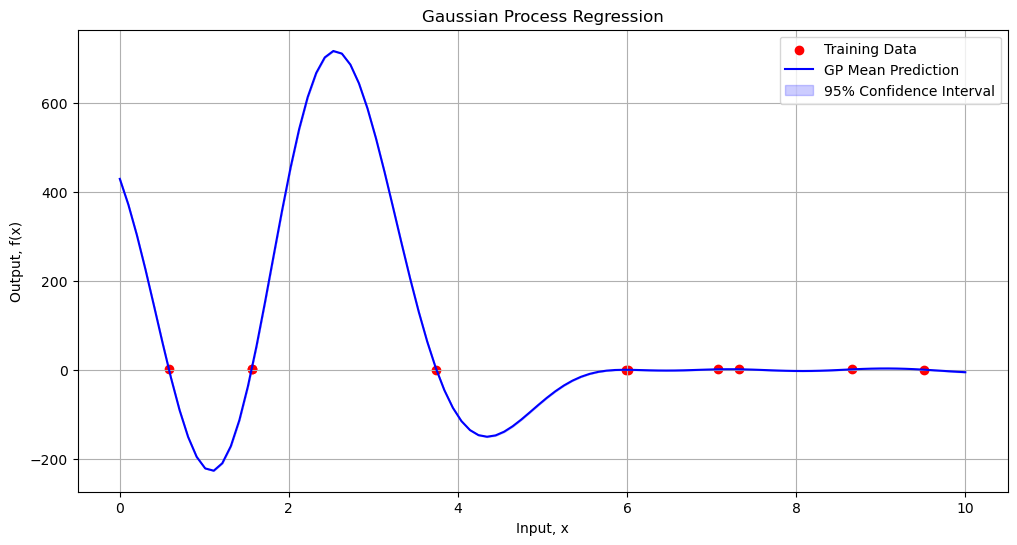

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Kernel function (Radial Basis Function)
def kernel(x1, x2, length_scale=1.0, variance=1.0):
    """Compute the kernel (covariance) between two points."""
    sqdist = np.sum(x1**2, axis=1).reshape(-1, 1) + np.sum(x2**2, axis=1) - 2 * np.dot(x1, x2.T)
    return variance * np.exp(-0.5 / length_scale**2 * sqdist)

# Generate synthetic training data
np.random.seed(42)
X_train = np.random.uniform(0, 10, (10, 1))  # 10 training points
y_train = np.sin(X_train) + np.random.normal(0, 0.1, X_train.shape)  # Add some noise

# Define test points
X_test = np.linspace(0, 10, 100).reshape(-1, 1)

# Compute the covariance matrices
K = kernel(X_train, X_train)  # Training kernel
K_s = kernel(X_train, X_test)  # Cross kernel
K_ss = kernel(X_test, X_test)   # Test kernel

# Compute the Cholesky decomposition for numerical stability
L = np.linalg.cholesky(K + 1e-10 * np.eye(len(X_train)))

# Solve for alpha
alpha = np.linalg.solve(L.T, np.linalg.solve(L, y_train))

# Mean prediction
y_mean = K_s.T.dot(alpha)

# Compute the posterior covariance
v = np.linalg.solve(L, K_s)
y_cov = K_ss - v.T.dot(v)

# Plotting
plt.figure(figsize=(12, 6))

# Plot training data
plt.scatter(X_train, y_train, color='red', label='Training Data')

# Plot predictions
plt.plot(X_test, y_mean, 'b-', label='GP Mean Prediction')

# Plot uncertainty
std_dev = np.sqrt(np.diag(y_cov))
plt.fill_between(X_test.flatten(), y_mean.flatten() - 1.96 * std_dev, y_mean.flatten() + 1.96 * std_dev, 
                 color='blue', alpha=0.2, label='95% Confidence Interval')

plt.title('Gaussian Process Regression')
plt.xlabel('Input, x')
plt.ylabel('Output, f(x)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import math
import random

# Kernel function (Radial Basis Function)
def kernel(x1, x2, length_scale=1.0, variance=1.0):
    """Compute the kernel (covariance) between two points."""
    sqdist = sum((x1[i] - x2[i]) ** 2 for i in range(len(x1)))
    return variance * math.exp(-0.5 / length_scale ** 2 * sqdist)

# Generate synthetic training data
random.seed(42)
X_train = [random.uniform(0, 10) for _ in range(10)]  # 10 training points
y_train = [math.sin(x) + random.gauss(0, 0.1) for x in X_train]  # Add some noise

# Define test points
X_test = [i / 10 for i in range(101)]  # 100 test points from 0 to 10

# Compute the covariance matrices
K = [[kernel([X_train[i]], [X_train[j]]) for j in range(len(X_train))] for i in range(len(X_train))]  # Training kernel
K_s = [[kernel([X_train[i]], [X_test[j]]) for j in range(len(X_test))] for i in range(len(X_train))]  # Cross kernel
K_ss = [[kernel([X_test[i]], [X_test[j]]) for j in range(len(X_test))] for i in range(len(X_test))]  # Test kernel

# Cholesky decomposition for numerical stability
def cholesky_decomposition(K):
    """Perform Cholesky decomposition."""
    L = [[0.0] * len(K) for _ in range(len(K))]
    for i in range(len(K)):
        for j in range(i + 1):
            s = sum(L[i][k] * L[j][k] for k in range(j))
            if i == j:
                L[i][j] = math.sqrt(K[i][i] - s)
            else:
                L[i][j] = (K[i][j] - s) / L[j][j]
    return L

L = cholesky_decomposition(K)

# Solve for alpha
def solve_lower_triangular(L, y):
    """Solve Ly = b for y given L is a lower triangular matrix."""
    y_ = [0.0] * len(y)
    for i in range(len(L)):
        s = sum(L[i][j] * y_[j] for j in range(i))
        y_[i] = (y[i] - s) / L[i][i]
    return y_

def solve_upper_triangular(L, y):
    """Solve L^T x = y for x given L is a lower triangular matrix."""
    x = [0.0] * len(y)
    for i in range(len(L) - 1, -1, -1):
        s = sum(L[j][i] * x[j] for j in range(i + 1, len(L)))
        x[i] = (y[i] - s) / L[i][i]
    return x

alpha = solve_lower_triangular(L, y_train)
alpha = solve_upper_triangular(L, alpha)

# Mean prediction
y_mean = [sum(K_s[i][j] * alpha[j] for j in range(len(alpha))) for i in range(len(K_s))]

# Compute the posterior covariance
def solve(K, K_s):
    """Solve K * v = K_s for v."""
    v = [0.0] * len(K_s[0])  # Initialize v
    for i in range(len(K)):
        for j in range(len(K_s[i])):  # Use the length of K_s[i] to avoid index errors
            v[j] += K[i][j] * K_s[i][j]  # Corrected multiplication
    return v

v = solve(K, K_s)

# Posterior covariance
y_cov = [[K_ss[i][j] - sum(v[i] * v[j] for j in range(len(v))) for j in range(len(K_ss))] for i in range(len(K_ss))]

# Plotting
plt.figure(figsize=(12, 6))

# Plot training data
plt.scatter(X_train, y_train, color='red', label='Training Data')

# Plot predictions
plt.plot(X_test, y_mean, 'b-', label='GP Mean Prediction')

# Plot uncertainty
std_dev = [math.sqrt(y_cov[i][i]) for i in range(len(y_cov))]
plt.fill_between(
    X_test,
    [y_mean[i] - 1.96 * std_dev[i] for i in range(len(y_mean))],
    [y_mean[i] + 1.96 * std_dev[i] for i in range(len(y_mean))],
    color='blue', alpha=0.2, label='95% Confidence Interval'
)

plt.title('Gaussian Process Regression')
plt.xlabel('Input, x')
plt.ylabel('Output, f(x)')
plt.legend()
plt.grid()
plt.show()


## Gaussian Process Regression

Let $\{(x_n, f_n) \mid n = 1, \ldots, N\}$ be the training samples, where $f_n$, $n = 1, \ldots, N$ are the noise-free training outputs of $x_n$, typically continuous functions for regression or discrete functions for classification. Denote the noise-free training output vector $f = [f_1, \ldots, f_N]^T$ and the test output vector $f^* = [f_1^*, \ldots, f_{N^*}^*]^T$ given the test samples $x^*_1, \ldots, x^*_{N^*}$.

Under the assumption of Gaussian distributions:

$$
\begin{bmatrix}
f \\
f^*
\end{bmatrix}
\sim \mathcal{N} \left( 
\begin{bmatrix}
0 \\
0
\end{bmatrix},
\begin{bmatrix}
K(X, X) & K(X, X^*) \\
K(X^*, X) & K(X^*, X^*)
\end{bmatrix} 
\right)
$$

where $X = [x_1, \ldots, x_N]$ and $X^* = [x^*_1, \ldots, x^*_{N^*}]$ are the $N \times N$ training sample matrix and the $N^* \times N^*$ test sample matrix, respectively; and $K(X, X) = \text{cov}(X) \in \mathbb{R}^{N \times N}$, $K(X, X^*) = \text{cov}(X, X^*) \in \mathbb{R}^{N \times N^*}$, $K(X^*, X) = \text{cov}(X^*, X) = K^T(X, X^*) \in \mathbb{R}^{N^* \times N}$, and $K(X^*, X^*) = \text{cov}(X^*) \in \mathbb{R}^{N^* \times N^*}$ are the covariance function matrices, respectively.

The conditional distribution of $f^*$ given $f$ can be expressed as:

$$
f^* \mid f \sim \mathcal{N} \left( K(X^*, X) K^{-1}(X, X) f, K(X^*, X^*) - K(X^*, X) K^{-1}(X, X) K(X, X^*) \right)
$$

In practical applications, the noisy training output vector $y = f + e$ is observed, where the additive Gaussian white noise $e \sim \mathcal{N}(0, \sigma_n^2 I)$. In this case, 

$$
y \sim \mathcal{N}(0, \text{cov}(y))
$$

with 

$$
\text{cov}(y_i, y_j) = K(y_i, y_j) + \sigma_n^2 \delta_{ij} \quad \text{or} \quad y \sim \mathcal{N} \left(0, K(X, X) + \sigma_n^2 I\right).
$$

The joint distribution of $y$ and $f^*$ according to the prior is given by:

$$
\begin{bmatrix}
y \\
f^*
\end{bmatrix}
\sim \mathcal{N} \left( 
\begin{bmatrix}
0 \\
0
\end{bmatrix},
\begin{bmatrix}
K(X, X) + \sigma_n^2 I & K(X, X^*) \\
K(X^*, X) & K(X^*, X^*)
\end{bmatrix}
\right)
$$

From this, we obtain the conditional distribution of $f^*$ given $y$:

$$
f^* \mid y \sim \mathcal{N}( \bar{f}^*, \text{cov}(f^*) )
$$

where 

$$
\bar{f}^* = E\{f^* \mid y\} = K(X^*, X) (K(X, X) + \sigma_n^2 I)^{-1} y
$$

and 

$$
\text{cov}(f^*) = K(X^*, X^*) - K(X^*, X) (K(X, X) + \sigma_n^2 I)^{-1} K(X, X^*).
$$

### Efficient Algorithm for Gaussian Process Regression

The steps for the Gaussian Process Regression algorithm are as follows:

1. **Input**: $X$ (inputs), $y$ (targets), $k$ (covariance function), $\sigma_n^2$ (noise level), $x^*$ (test input).
2. Construct the matrix $K$ whose $(i, j)$ elements are $K_{ij} = k(x_i, x_j)$, for $i, j = 1, \ldots, N$.
3. Make Cholesky decomposition: $K + \sigma_n^2 I = LL^T$.
4. Solve the triangular system $Lz = y$ for $z$ by forward substitution.
5. Solve the triangular system $L^T \alpha = z$ for $\alpha$ by back substitution.
6. $\bar{f}^* = k^T \alpha$.
7. Solve the triangular system $Lv = k^*$ for $v$ by forward substitution.
8. $\text{var}(f^*) = k(x^*, x^*) - v^T v$.
9. Log marginal likelihood:

$$
\log p(y|X) = -\frac{1}{2} y^T \alpha - \frac{N}{2} \sum_{i=1}^{N} L_{ii} - \frac{1}{2} \log(2\pi).
$$

10. **Output**: $\bar{f}^*$ (mean), $\text{var}(f^*)$ (variance), $\log p(y|X)$ (log marginal likelihood).


ValueError: math domain error

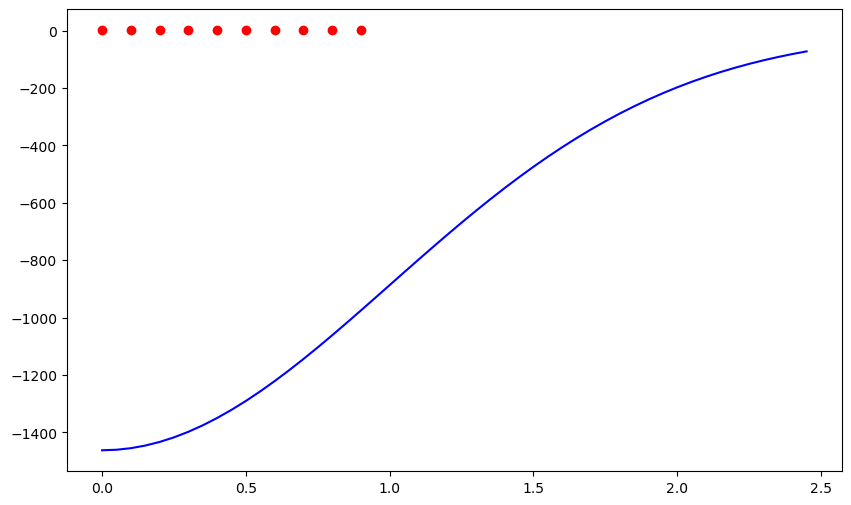

In [8]:
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Define the squared exponential kernel function
def kernel(x1, x2, length_scale=1.0, variance=1.0):
    """Squared exponential kernel function."""
    return variance * math.exp(-0.5 * ((x1 - x2) ** 2) / (length_scale ** 2))

# Create covariance matrix
def compute_covariance_matrix(X, noise_variance=1e-10):
    """Compute the covariance matrix."""
    K = [[kernel(x1, x2) for x2 in X] for x1 in X]
    for i in range(len(K)):
        K[i][i] += noise_variance  # Add noise variance to the diagonal
    return K

# Forward substitution to solve Lz = y
def forward_substitution(L, y):
    """Solve lower triangular system."""
    z = [0] * len(y)
    for i in range(len(L)):
        s = sum(L[i][j] * z[j] for j in range(i))
        z[i] = (y[i] - s) / L[i][i]
    return z

# Back substitution to solve L^T α = z
def back_substitution(L, z):
    """Solve upper triangular system."""
    alpha = [0] * len(z)
    for i in range(len(L) - 1, -1, -1):
        s = sum(L[j][i] * alpha[j] for j in range(i + 1, len(L)))
        alpha[i] = (z[i] - s) / L[i][i]
    return alpha

# Cholesky decomposition
def cholesky_decomposition(K):
    """Perform Cholesky decomposition."""
    L = [[0] * len(K) for _ in range(len(K))]
    for i in range(len(K)):
        for j in range(i + 1):
            s = sum(L[i][k] * L[j][k] for k in range(j))
            if i == j:
                L[i][j] = math.sqrt(K[i][i] - s)
            else:
                L[i][j] = (K[i][j] - s) / L[j][j]
    return L

# Gaussian Process Regression
def gaussian_process_regression(X_train, y_train, X_test, noise_variance=1e-10):
    """Perform Gaussian Process Regression."""
    # Compute covariance matrices
    K = compute_covariance_matrix(X_train, noise_variance)
    K_s = [kernel(x_test, x) for x in X_train for x_test in X_test]
    K_test = [[kernel(x1, x2) for x2 in X_test] for x1 in X_test]

    # Cholesky decomposition
    L = cholesky_decomposition(K)
    
    # Solve for alpha
    z = forward_substitution(L, y_train)
    alpha = back_substitution(L, z)

    # Mean prediction
    mean = [sum(K_s[i] * alpha[j] for j in range(len(alpha))) for i in range(len(X_test))]
    
    # Variance prediction
    v = forward_substitution(L, K_s)
    variance = [K_test[i][i] - sum(v[j] * v[j] for j in range(len(v))) for i in range(len(X_test))]

    return mean, variance

# Generate synthetic data for demonstration
X_train = [i * 0.1 for i in range(10)]
y_train = [math.sin(x) + (0.1 * (random.random() - 0.5)) for x in X_train]  # Noisy observations
X_test = [i * 0.05 for i in range(50)]

# Perform Gaussian Process Regression
mean, variance = gaussian_process_regression(X_train, y_train, X_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ro', label='Training Data')
plt.plot(X_test, mean, 'b-', label='Mean Prediction')
plt.fill_between(X_test, 
                 [m - math.sqrt(v) for m, v in zip(mean, variance)],
                 [m + math.sqrt(v) for m, v in zip(mean, variance)],
                 color='blue', alpha=0.2, label='Confidence Interval')
plt.title('Gaussian Process Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
